In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Reading the data file
df = pd.read_csv("/content/DT-BrainCancer.csv")

In [5]:
df

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...,...
83,84,Male,HG glioma,Supratentorial,80,0.16,1
84,85,Male,HG glioma,Supratentorial,80,19.81,1
85,86,Male,Meningioma,Supratentorial,90,2.50,0
86,87,Male,Meningioma,Supratentorial,90,2.02,0


In [6]:
df.dropna(how="all",axis=1,inplace=True)
df

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...,...
83,84,Male,HG glioma,Supratentorial,80,0.16,1
84,85,Male,HG glioma,Supratentorial,80,19.81,1
85,86,Male,Meningioma,Supratentorial,90,2.50,0
86,87,Male,Meningioma,Supratentorial,90,2.02,0


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,1
84,Male,HG glioma,Supratentorial,80,19.81,1
85,Male,Meningioma,Supratentorial,90,2.50,0
86,Male,Meningioma,Supratentorial,90,2.02,0


In [8]:
df.dropna(how="all",axis=0,inplace=True)
df

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,1
84,Male,HG glioma,Supratentorial,80,19.81,1
85,Male,Meningioma,Supratentorial,90,2.50,0
86,Male,Meningioma,Supratentorial,90,2.02,0


In [9]:
df=df.drop_duplicates()
df

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1
...,...,...,...,...,...,...
83,Male,HG glioma,Supratentorial,80,0.16,1
84,Male,HG glioma,Supratentorial,80,19.81,1
85,Male,Meningioma,Supratentorial,90,2.50,0
86,Male,Meningioma,Supratentorial,90,2.02,0


In [10]:
# Shuffle the dataset for randomness
df = shuffle(df, random_state=42).reset_index(drop=True)

In [11]:
# Apply one-hot encoding to all categorical columns
df_new = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity

In [12]:
# Shuffle the data before splitting
df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
df_new= df_new.astype(int)

In [14]:
df_new

,ki,gtv,status,sex_Male,diagnosis_LG glioma,diagnosis_Meningioma,diagnosis_Other,loc_Supratentorial
0,90,2,1,1,0,0,0,1
1,80,2,0,0,0,1,0,1
2,80,4,0,0,0,1,0,1
3,80,1,0,0,0,1,0,1
4,80,24,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
83,90,6,0,0,0,1,0,0
84,70,8,0,1,0,1,0,1
85,80,4,0,1,0,1,0,1
86,80,19,1,1,0,0,0,1


In [15]:
# Separate features (X) and labels (y)
X = df_new.drop(columns="status")
y = df["status"]

In [16]:
# Calculate split indices
train_end = int(0.7 * len(X))
val_end = int(0.85 * len(X))

# Split the data into train, validation, and test sets
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

In [17]:
# Display shapes to verify
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (61, 7) y_train: (61,)
X_val: (13, 7) y_val: (13,)
X_test: (14, 7) y_test: (14,)


###Decision Tree

In [18]:
model=DecisionTreeClassifier(criterion='entropy')

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
# Predict on validation set
y_val_pred = model.predict(X_val)

In [21]:
# Predict on test set (optional final evaluation)
y_test_pred = model.predict(X_test)

In [22]:
y_test_pred.shape

(14,)

In [23]:
y_test.shape

(14,)

In [24]:
print(type(y_test))
print(type(y_test_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [25]:
y_test=y_test.to_numpy()
y_test.shape

(14,)

In [26]:
print(type(y_test))
print(type(y_test_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [27]:
# Accuracy with validation set
correct_predictions = np.sum(y_val_pred == y_val)
total_predictions = y_val.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 23.08%


In [28]:
# Accuracy with test set
correct_predictions = np.sum(y_test_pred == y_test)
total_predictions = y_test.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 57.14%


In [29]:
def true_positive(test,pred):
  tp=0

  for i in range(test.size):
        if test[i] == 1 and pred[i] == 1:
            tp += 1


  return tp

In [30]:
def false_positive(test, pred):
    fp = 0

    for i in range(test.size):
        if pred[i] == 1 and test[i] == 0:
            fp += 1

    return fp

In [31]:
def false_negative(test, pred):
    fn = 0

    for i in range(test.size):
        if pred[i] == 0 and test[i] == 1:
            fn += 1


    return fn

In [32]:
def true_negative(test, pred):
    tn = 0

    for i in range(test.size):
        if pred[i] == 0 and test[i] == 0:
            tn += 1


    return tn

In [33]:
y_test.shape

(14,)

In [34]:
y_test_pred.shape

(14,)

In [35]:
tp=true_positive(y_test,y_test_pred)

In [36]:
tp

1

In [37]:
fp=false_positive(y_test,y_test_pred)

In [38]:
fp

1

In [39]:
fn=false_negative(y_test_pred,y_test)

In [40]:
fn

1

In [41]:
tn=true_negative(y_test_pred,y_test)

In [42]:
tn

7

In [43]:
# Construct the OvR confusion matrices for each class
confusion_matrix_a = np.array([[tp, fn], [fp, tn]])

In [44]:
confusion_matrix_a

array([[1, 1],
       [1, 7]])

In [45]:
tp,fp,fn,tn

(1, 1, 1, 7)

In [46]:
precision=tp/(tp+fp)
precision

0.5

In [47]:
recall=tp/(tp+fn)

In [48]:
f1score=(2*recall*precision)/(recall+precision)
f1score

0.5

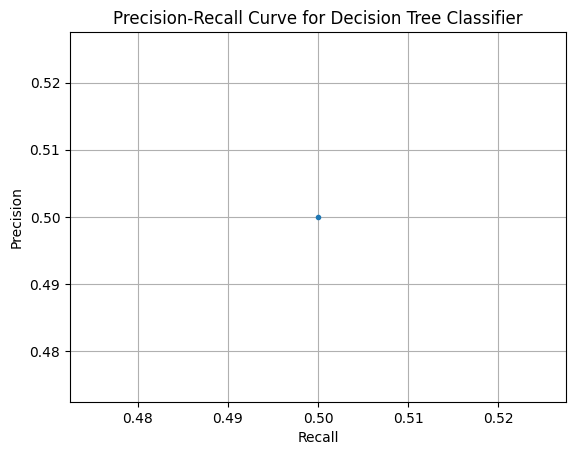

In [49]:
# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Classifier')
plt.grid(True)
plt.show()

###XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
model1=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
# Predict with XGBoost
y_test_pred1 = model1.predict(X_test)

In [53]:
print(type(y_test))
print(type(y_test_pred1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
# Accuracy with test set
correct_predictions = np.sum(y_test_pred1 == y_test)
total_predictions = y_test.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 50.00%


In [55]:
tp1=true_positive(y_test,y_test_pred1)
fp1=false_positive(y_test,y_test_pred1)
fn1=false_negative(y_test,y_test_pred1)
tn1=true_negative(y_test,y_test_pred1)

In [56]:
# Construct the OvR confusion matrices for each class
confusion_matrix_a1 = np.array([[tp1, fn1], [fp1, tn1]])

In [62]:
precision1=tp1/(tp1+fp1)
precision1

0.3333333333333333

In [58]:
recall1=tp1/(tp1+fn1)

In [63]:
recall1

0.16666666666666666

In [64]:
fscore1=(2*recall1*precision1)/(recall1+precision1)

In [65]:
fscore1

0.2222222222222222

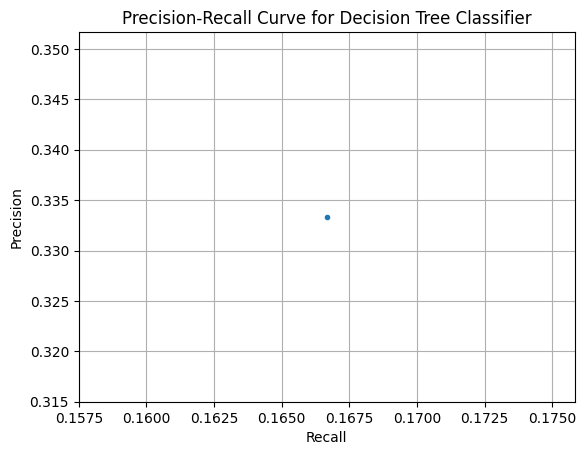

In [60]:
# Plot the precision-recall curve
plt.plot(recall1, precision1, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Classifier')
plt.grid(True)
plt.show()